# 0) IMPORTANDO BIBLIOTECAS

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib.pyplot import figure

# 1) Lendo o arquivo

In [3]:
turbine = pd.read_csv("data_base/T1.csv",sep=',')
turbine.columns = ["Data/Hora", 'Potência Ativa (kW)', 'Velocidade do vento (m/s)', 'Curva Teórica (kWh)', 'Direção do Vendo (º)']
del turbine['Direção do Vendo (º)']
turbine['Data/Hora'] = pd.to_datetime(turbine['Data/Hora'],format="%d %m %Y %H:%M")
display(turbine)

,Data/Hora,Potência Ativa (kW),Velocidade do vento (m/s),Curva Teórica (kWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


# 2) Plotando os dados em um gráfico - Curva Real

c:\Users\jvBra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvBra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Potência Ativa (kW)'>

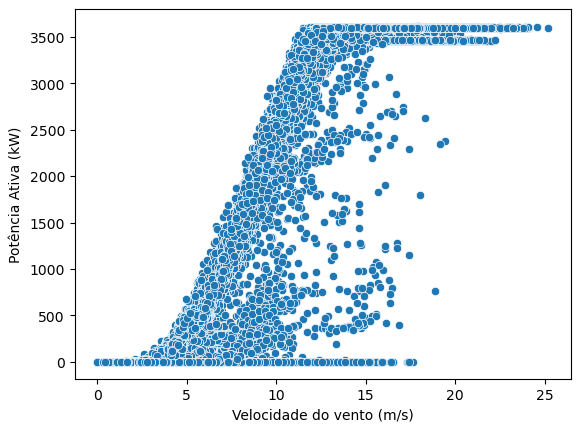

In [4]:
sns.scatterplot(data=turbine, x='Velocidade do vento (m/s)',y='Potência Ativa (kW)')

# 3) Plotando os dados em um gráfico - Teórico

c:\Users\jvBra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvBra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Curva Teórica (kWh)'>

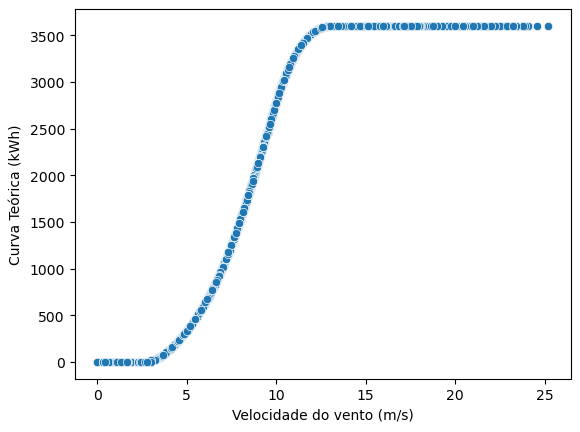

In [5]:
sns.scatterplot(data=turbine, x='Velocidade do vento (m/s)',y='Curva Teórica (kWh)')

# 4) Criando "limites aceitáveis" - Aplicando 5% em uma margem de erro

In [6]:
pot_Real = turbine['Potência Ativa (kW)'].to_list()
pot_Teorica = turbine['Curva Teórica (kWh)'].to_list()
pot_Max = []
pot_Min = []
for pot in pot_Teorica:
    pot_Max.append(pot*1.05)
    pot_Min.append(pot*0.95)

dentro_limite = []
for p,potencia in enumerate(pot_Real):
    if potencia>=pot_Min[p] and potencia<=pot_Max[p]:
        dentro_limite.append("Dentro")
    elif potencia == 0:
        dentro_limite.append("Zero")
    else:
        dentro_limite.append("Fora")  


# 5) Adicionando lista "dentro_limite" ao dataframe, construindo as zonas de dados aceitáveis:

In [7]:
turbine["Limite 5%"] = dentro_limite
display(turbine)

,Data/Hora,Potência Ativa (kW),Velocidade do vento (m/s),Curva Teórica (kWh),Limite 5%
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


# 6) Plotando o gráfico novamente:

c:\Users\jvBra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvBra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvBra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvBra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Potência Ativa (kW)'>

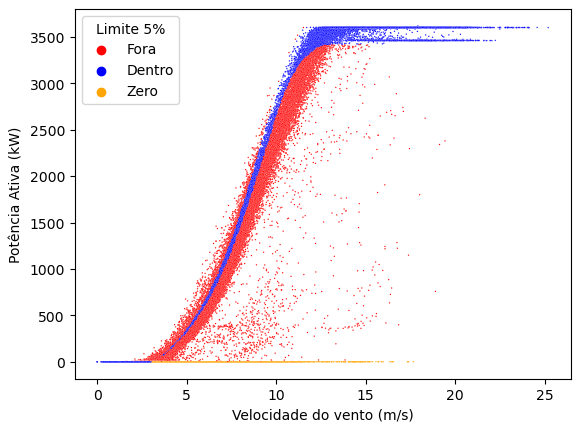

In [8]:
cores = {"Dentro":'blue', 'Fora':'red','Zero':'orange'}
sns.scatterplot(data=turbine, x='Velocidade do vento (m/s)',y='Potência Ativa (kW)', hue='Limite 5%',s=1,palette=cores)